LLM and Needed Libraries Import

In [ ]:

from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="gemini-embedding-001" , google_api_key="API")
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name="gpt-4o", temperature=0.7 , openai_api_key="API")

In [2]:
result = llm.invoke("Write a poem about ranil wickramasinghe")
print(result.content)

In the island nation where the oceans sing,  
Stands a leader known as Ranil Wickramasinghe,  
With wisdom carved from history's page,  
A statesman walking through a turbulent age.  

Born under the Lankan sun's embrace,  
He carries forward a storied place,  
With dreams of unity and lasting peace,  
He strives for the island's woes to cease.  

From bustling Colombo to the rural fields,  
His vision for progress never yields,  
Balancing tradition with modern grace,  
Seeking to uplift every face.  

Through trials that test the strongest will,  
He navigates with a statesman's skill,  
In the halls of power, his voice resounds,  
Guiding the nation through ups and downs.  

A tapestry woven with diverse threads,  
A future of hope, where history treads,  
Ranil dreams of a brighter morn,  
For the land where he was born.  

With every challenge that time may bring,  
His steadfast heart continues to sing,  
Of peace, prosperity, and dreams anew,  
In the heart of Lanka, where skies

Build Retriver

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)



187

hugging face embesdding

In [4]:
from langchain_community.embeddings import HuggingFaceEmbeddings
huggingface_embeddings = HuggingFaceEmbeddings()

C:\Users\GIHAN LAKMAL\AppData\Local\Temp\ipykernel_48812\2653006643.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  huggingface_embeddings = HuggingFaceEmbeddings()
C:\Users\GIHAN LAKMAL\AppData\Local\Temp\ipykernel_48812\2653006643.py:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  huggingface_embeddings = HuggingFaceEmbeddings()


KeyboardInterrupt: 

store in a Vector DB

In [11]:
# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=embeddings,
)
retriever = vectorstore.as_retriever()

GoogleGenerativeAIError: Error embedding content: 400 * BatchEmbedContentsRequest.model: unexpected model name format
* BatchEmbedContentsRequest.requests[0].model: unexpected model name format
* BatchEmbedContentsRequest.requests[1].model: unexpected model name format
* BatchEmbedContentsRequest.requests[2].model: unexpected model name format
* BatchEmbedContentsRequest.requests[3].model: unexpected model name format
* BatchEmbedContentsRequest.requests[4].model: unexpected model name format
* BatchEmbedContentsRequest.requests[5].model: unexpected model name format
* BatchEmbedContentsRequest.requests[6].model: unexpected model name format
* BatchEmbedContentsRequest.requests[7].model: unexpected model name format
* BatchEmbedContentsRequest.requests[8].model: unexpected model name format
* BatchEmbedContentsRequest.requests[9].model: unexpected model name format
* BatchEmbedContentsRequest.requests[10].model: unexpected model name format
* BatchEmbedContentsRequest.requests[11].model: unexpected model name format
* BatchEmbedContentsRequest.requests[12].model: unexpected model name format
* BatchEmbedContentsRequest.requests[13].model: unexpected model name format
* BatchEmbedContentsRequest.requests[14].model: unexpected model name format
* BatchEmbedContentsRequest.requests[15].model: unexpected model name format
* BatchEmbedContentsRequest.requests[16].model: unexpected model name format
* BatchEmbedContentsRequest.requests[17].model: unexpected model name format
* BatchEmbedContentsRequest.requests[18].model: unexpected model name format
* BatchEmbedContentsRequest.requests[19].model: unexpected model name format
* BatchEmbedContentsRequest.requests[20].model: unexpected model name format
* BatchEmbedContentsRequest.requests[21].model: unexpected model name format
* BatchEmbedContentsRequest.requests[22].model: unexpected model name format
* BatchEmbedContentsRequest.requests[23].model: unexpected model name format
* BatchEmbedContentsRequest.requests[24].model: unexpected model name format
* BatchEmbedContentsRequest.requests[25].model: unexpected model name format
* BatchEmbedContentsRequest.requests[26].model: unexpected model name format
* BatchEmbedContentsRequest.requests[27].model: unexpected model name format
* BatchEmbedContentsRequest.requests[28].model: unexpected model name format
* BatchEmbedContentsRequest.requests[29].model: unexpected model name format
* BatchEmbedContentsRequest.requests[30].model: unexpected model name format
* BatchEmbedContentsRequest.requests[31].model: unexpected model name format
* BatchEmbedContentsRequest.requests[32].model: unexpected model name format
* BatchEmbedContentsRequest.requests[33].model: unexpected model name format
* BatchEmbedContentsRequest.requests[34].model: unexpected model name format


Lets Create a RAG Chain Now

In [6]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt = hub.pull("rlm/rag-prompt")

print(f"---PROMPT--- {prompt}")

# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = prompt | llm | StrOutputParser()

c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


---PROMPT--- input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


RAG chain Test

In [7]:
# Run
question = "tell me about agent memory."
generation = rag_chain.invoke({"context": doc_splits, "question": question})
print(generation)

Agent memory in LLM-powered autonomous systems consists of two types: short-term memory and long-term memory. Short-term memory utilizes in-context learning, allowing the model to process information during a session. Long-term memory enables the agent to retain and recall information over extended periods, often using an external vector store for fast retrieval.


Now lets create grade document class which is accountable for check if user quire is relevent to the document or not

In [8]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )

c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3579: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# LLM with function call
structured_llm_grader = llm.with_structured_output(GradeDocuments)
# Prompt
system = """You are a grader assessing relevance of a retrieved document to a user question. \n 
    If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader

Testing , if working or Not

In [10]:
question = "tell me about the agent memory."
docs = retriever.get_relevant_documents(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

C:\Users\GIHAN LAKMAL\AppData\Local\Temp\ipykernel_41820\2925432907.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(question)


binary_score='no'


In [11]:
question = "tell me about the Tajmahal."
docs = retriever.get_relevant_documents(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

binary_score='no'


### Let's Create Question Re-Writer

Re Writing the question

In [12]:
### Question Re-writer
# Prompt
from langchain_core.prompts import ChatPromptTemplate

system = """You a question re-writer that converts an input question to a better version that is optimized \n 
     for web search. Look at the input and try to reason about the underlying semantic intent / meaning."""
     
     
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

question_rewriter = re_write_prompt | llm | StrOutputParser()

In [13]:
question_rewriter.invoke({"question": question})


'What is the history and significance of the Taj Mahal?'

### Corrective Implementation

lets create functions that needed 

Agent State Define

In [14]:
from typing import List
from langgraph.graph import END, StateGraph, START
from typing_extensions import TypedDict

class State(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        web_search: whether to add search
        documents: list of documents
    """

    question: str
    generation: str
    web_search: str
    documents: List[str]

workflow= StateGraph(State)

retrive agent

In [15]:
#basically here we try to get most similar documents to the question
def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
    
    """
    print("---RETRIEVE---")
    
    question = state["question"]
    
    documents = retriever.get_relevant_documents(question)
    
    return {"documents": documents, "question": question}
    

testing

In [16]:
x = retrieve({"question": "do u knwo about bla bla black ships?"})


---RETRIEVE---


In [17]:
for key, value in x.items():
    print(f"Key: {key} | Value: {value}")

Key: documents | Value: [Document(metadata={'description': 'The use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space. Attacks for discrete data like text have been considered to be a lot more challenging, due to lack of direct gradient signals. My past post on Controllable Text Generation is quite relevant to this topic, as attacking LLMs is essentially to control the model to output a certain type of (unsafe) content.', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/', 'title': "A

grade Agent

In [18]:
def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """
    
    print("---CHECKING DOCUMENT RELEVANT IS TO QUESTION OR NOT---")
    
    question = state["question"]
    
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    
    web_search = "No"
    
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        ) 
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            web_search = "Yes"
            continue
    return {"documents": filtered_docs, "question": question, "web_search": web_search}

generate Agent

In [19]:
def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    
    print("---GENERATE---")
    
    question = state["question"]
    documents = state["documents"]
    
    generation = rag_chain.invoke({"context": documents, "question": question})
    
    return {"documents": documents, "question": question, "generation": generation}

Transform the querry Agent

In [20]:
def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """
    print("---TRANSFORM QUERY---")
    
    question = state["question"]
    
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    
    return {"documents": documents, "question": better_question}

### Web Crawling we gonna perform using Tavily

In [21]:
### Search

from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool = TavilySearchResults(k=3 , tavily_api_key="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")

C:\Users\GIHAN LAKMAL\AppData\Local\Temp\ipykernel_41820\1927559686.py:5: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  web_search_tool = TavilySearchResults(k=3 , tavily_api_key="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")


In [22]:

# Try a simple test query
try:
    results = web_search_tool.run("Latest news on AI")
    print("Tavily API key is working!")
    print("Sample result:", results[:500])  # Print first 500 chars
except Exception as e:
    print("Error: Tavily API key is not working.")
    print(e)


Tavily API key is working!
Sample result: HTTPError('432 Client Error:  for url: https://api.tavily.com/search')


In [23]:


try:
    # Simple query with minimal params
    results = web_search_tool.run("Hello world")
    print("API call successful!")
    print("Result preview:", results[:500])
except Exception as e:
    print("API call failed!")
    print(e)


API call successful!
Result preview: HTTPError('432 Client Error:  for url: https://api.tavily.com/search')


In [24]:
from langchain.schema import Document
from langchain.schema import Document

def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """
    print("---WEB SEARCH---")
    
    question = state["question"]
    documents = state["documents"]

    # Web search
    docs = web_search_tool.invoke({"query": question})

    # Handle if docs is a list of strings or a single string
    if isinstance(docs, list):
        web_results = "\n".join(docs)
    else:
        web_results = str(docs)

    # Wrap in Document
    web_results_doc = Document(page_content=web_results)
    documents.append(web_results_doc)

    return {"documents": documents, "question": question}




getting error in Tavily serch API Key

In [26]:
web_search({"question": "tell me about the Tajmahal." , "documents": ["hey "]})

---WEB SEARCH---


{'documents': ['hey ',
  Document(metadata={}, page_content="HTTPError('432 Client Error:  for url: https://api.tavily.com/search')")],
 'question': 'tell me about the Tajmahal.'}

Deciding Agent

In [27]:
def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """
    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    web_search = state["web_search"]
    state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

Let's create a skeleton of code then will create the function accordingly

In [28]:
# define the nodes
# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query
workflow.add_node("web_search_node", web_search)  # web search

In [29]:
# Build graph
workflow.add_edge(START, "retrieve")

workflow.add_edge("retrieve", "grade_documents")

workflow.add_conditional_edges("grade_documents", decide_to_generate, {"transform_query": "transform_query","generate": "generate",}),

workflow.add_edge("transform_query", "web_search_node")

workflow.add_edge("web_search_node", "generate")

workflow.add_edge("generate", END)

In [30]:
# Compile
app = workflow.compile()

In [ ]:

# Display the graph
from IPython.display import Image, display 
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

C:\Users\GIHAN LAKMAL\AppData\Local\Temp\ipykernel_41820\83072921.py:8: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans Mono.
  plt.savefig("graph.png", bbox_inches="tight", dpi=300)
c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


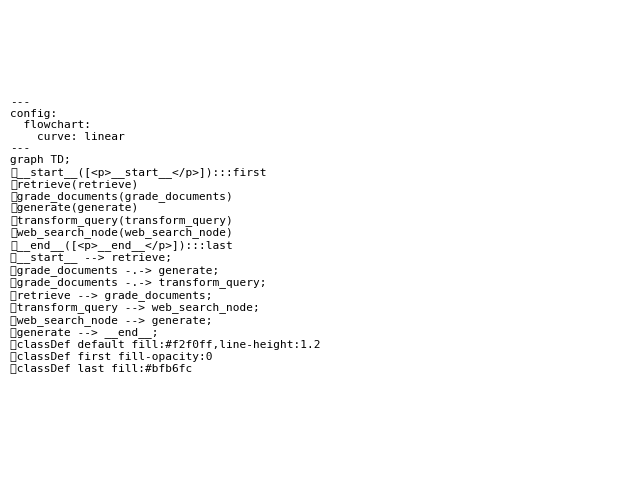

In [36]:
import matplotlib.pyplot as plt

mermaid_code = app.get_graph(xray=True).draw_mermaid()

plt.figure(figsize=(8, 6))
plt.text(0, 0.5, mermaid_code, fontsize=8, family="monospace", va="center")
plt.axis("off")
plt.savefig("graph.png", bbox_inches="tight", dpi=300)
plt.show()




In [37]:
from pprint import pprint

# Run
inputs = {"question": "tell me about the agent memory."}

In [38]:
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECKING DOCUMENT RELEVANT IS TO QUESTION OR NOT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('In an LLM-powered autonomous agent system, memory is divided into short-term '
 'and long-term components. Short-term memory involves in-context learning and '
 'prompt engineering, while long-term memory allows the agent to retain and '
 'recall information over extended periods by using an external vector store '
 'and fast retrieval. This memory structure enables the agent to learn from '
 'past experiences and adapt its future actions accordingly.')


In [39]:
from pprint import pprint

# Run
inputs = {"question": "tell me about the taj mahal."}

tavily serch key issue

In [40]:
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECKING DOCUMENT RELEVANT IS TO QUESTION OR NOT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---
"Node 'grade_documents':"
'\n---\n'
---TRANSFORM QUERY---
"Node 'transform_query':"
'\n---\n'
---WEB SEARCH---
"Node 'web_search_node':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
"I don't know."
